#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 6**
###**Árboles de decisión y bosque aleatorio.**


**Nombres y matrículas de los integrantes del equipo:**

*   
*   
*   
*   
*   


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [34]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, make_scorer
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import warnings
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import learning_curve, validation_curve

#**Ejercicio-1.** 

In [35]:
drive.mount('/content/drive')
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SouthGermanCredit.asc',sep='\s+')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
df.rename(columns = {
    'laufkont':'status',
    'laufzeit':'duration',
    'moral':'credit_history',
    'verw':'purpose',
    'hoehe':'amount',
    'sparkont':'savings',
    'beszeit':'employment_duration',
    'rate':'installment_rate',
    'famges':'personal_status_sex',
    'buerge':'other_debtors',
    'wohnzeit':'present_residence',
    'verm':'property',
    'alter':'age',
    'weitkred':'other_installment_plans',
    'wohn':'housing',
    'bishkred':'number_credits',
    'beruf':'job',
    'pers':'people_liable',
    'telef':'telephone',
    'gastarb':'foreign_worker',
    'kredit':'credit_risk'
}, inplace = True)
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


#**Ejercicio-2.**

In [37]:
X = df.iloc[:,0:20]
Y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, stratify=Y, random_state=1)


In [38]:
y_train.sum() / y_train.shape[0]

0.7

#**Ejercicio-3.**

In [39]:
#3a
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 655 to 555
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   850 non-null    int64
 1   duration                 850 non-null    int64
 2   credit_history           850 non-null    int64
 3   purpose                  850 non-null    int64
 4   amount                   850 non-null    int64
 5   savings                  850 non-null    int64
 6   employment_duration      850 non-null    int64
 7   installment_rate         850 non-null    int64
 8   personal_status_sex      850 non-null    int64
 9   other_debtors            850 non-null    int64
 10  present_residence        850 non-null    int64
 11  property                 850 non-null    int64
 12  age                      850 non-null    int64
 13  other_installment_plans  850 non-null    int64
 14  housing                  850 non-null    int64
 15  numb

In [40]:
#Como no hay valores nulos, en este caso no hay imputaciones
#Columnas categoricas
df_categ = ['status','credit_history','purpose','savings','personal_status_sex','other_debtors','other_installment_plans','housing','telephone']
#columnas discretas
df_ord = ['employment_duration','installment_rate','present_residence','property','number_credits','job']
#columnas numericas o cuantitativas
df_num = ['duration','amount','age']
#columnas binarias
df_bin = ['people_liable','telephone','foreign_worker']

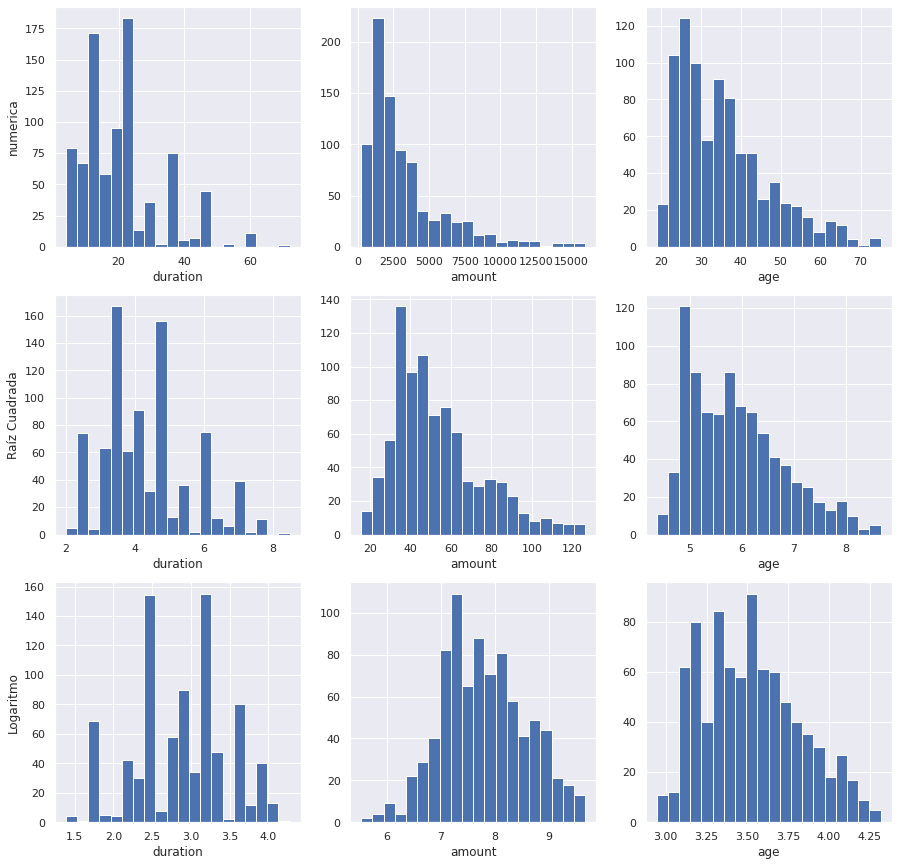

In [41]:
#3b
sns.set(rc={'figure.figsize':(15,15)}) #tama;o 20 en x y 20 en y
#Numerica
fig, axes = plt.subplots(3, 3)   
for k in range(0,3):  
  plt.subplot(3,3,k+1) 

  Transf0 = X_train[df_num].iloc[:,k].to_numpy().reshape(-1, 1)  #  En esta línea se debe asignar a Transf0 los valores de cada variable "k" sin transformar.
  plt.hist(Transf0, bins=20) 
  plt.xlabel(df_num[k])
  if k==0:
    plt.ylabel('numerica')
  
  plt.subplot(3,3,k+4)    
  Transf1 = np.sqrt(Transf0)       #  En esta línea se debe aplicar la raíz cuadrada a los valores de cada variable "k" sin transformar.
  plt.hist(Transf1, bins=20)                      #  En este línea agrega el comando para obtener el histograma de Transf1 con 20 barras (bins).
  plt.xlabel(df_num[k])
  if k==0:
    plt.ylabel('Raíz Cuadrada')

  plt.subplot(3,3,k+7)    
  Transf2 = np.log(Transf0)       #  En esta línea se debe aplicar la raíz cuadrada a los valores de cada variable "k" sin transformar.
  plt.hist(Transf2, bins=20)                      #  En este línea agrega el comando para obtener el histograma de Transf1 con 20 barras (bins).
  plt.xlabel(df_num[k])
  if k==0:
    plt.ylabel('Logaritmo')

In [42]:
#3c
num_pipeline = Pipeline(steps = [('scalar', MinMaxScaler(feature_range=(1,2))),('sqrt', FunctionTransformer(np.log))])
columna_df_num = df_num

categ_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')),('OneHotE', OneHotEncoder(drop='first', handle_unknown = 'ignore'))])
columna_df_categ = df_categ

bin_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')),('OneHotE', OneHotEncoder(drop='first', handle_unknown = 'ignore'))])
columna_df_bin = df_bin

columnasTransformer = ColumnTransformer(transformers = [('numpipe', num_pipeline, columna_df_num),
                                                        ('catpipe', categ_pipeline, columna_df_categ),
                                                        ('binpipe', bin_pipeline, columna_df_bin)],
                                        remainder='passthrough')


#**Ejercicio-4.**

In [43]:
def mi_recall(yreal, ypred):

  vn, fp, fn, vp = confusion_matrix(yreal, ypred).ravel()
  recall = vp/(vp+fn)
  
  return recall

In [44]:
def mi_gmean(yreal, ypred):
     vn, fp, fn, vp = confusion_matrix(yreal, ypred).ravel()
     recall = vp / (vp+fn)
     especificidad = vn / (vn+fp)
     gmean = np.sqrt(recall * especificidad)
     
     return gmean


In [45]:
def mi_accuracy(yreal, ypred):
  vn, fp, fn, vp = confusion_matrix(yreal, ypred).ravel()
  accuracy = (vp+vn) / (vp+vn+fp+fn)

  return accuracy

In [46]:
def mi_f1score(yreal, ypred):
  vn, fp, fn, vp = confusion_matrix(yreal, ypred).ravel()
  f1score = (2*vp) / ((2*vp)+fp+fn)

  return f1score
  

In [47]:
def mi_precision(yreal, ypred):
  vn, fp, fn, vp = confusion_matrix(yreal, ypred).ravel()
  precision = vp / (vp+fp)

  return precision

In [48]:
def get_models():
  modelos = list()
  nombres = list()

  # LR - Regresión Logística:
  modelos.append(LogisticRegression(solver='liblinear'))
  nombres.append('LR')

  # DT - Árbol de Decisión:
  modelos.append(DecisionTreeClassifier())
  nombres.append('DT')
  
  # BA - Bosque Aleatorio 
  modelos.append(RandomForestClassifier())
  nombres.append('BA')
  
  
  return modelos, nombres

In [49]:
modelos, nombres = get_models()  # cargamos los modelos a comparar
resultadosRecallTrain = list()   
resultadosCVTrain = list()

mismetricas = {'accuracy':make_scorer(mi_accuracy),'precision':make_scorer(mi_precision), 'recall':make_scorer(mi_recall),'f1-score':make_scorer(mi_f1score), 'gmean':make_scorer(mi_gmean)}

for i in range(len(modelos)):
  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])
  cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
  resultadosCVTrain = cross_validate(pipeline, X_train,y_train, scoring=mismetricas, cv=cv)
  resultadosRecallTrain.append(resultadosCVTrain['test_recall'])
  print('%s:\nAccuracy: %.3f (%.4f)\nPrecision: %.3f (%.4f)\nRecall: %.3f (%.4f)\nF1-Score: %.3f (%.4f)\nGmean: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(resultadosCVTrain['test_accuracy']),
                                                                          np.std(resultadosCVTrain['test_accuracy']), 
                                                                          np.mean(resultadosCVTrain['test_precision']),
                                                                          np.std(resultadosCVTrain['test_precision']),                                                                           
                                                                          np.mean(resultadosCVTrain['test_recall']),
                                                                          np.std(resultadosCVTrain['test_recall']),
                                                                          np.mean(resultadosCVTrain['test_f1-score']),
                                                                          np.std(resultadosCVTrain['test_f1-score']),                                                                           
                                                                          np.mean(resultadosCVTrain['test_gmean']),
                                                                          np.std(resultadosCVTrain['test_gmean']),  
                                                                          ))

LR:
Accuracy: 0.756 (0.0332)
Precision: 0.794 (0.0256)
Recall: 0.882 (0.0262)
F1-Score: 0.835 (0.0218)
Gmean: 0.636 (0.0622)

DT:
Accuracy: 0.692 (0.0237)
Precision: 0.782 (0.0184)
Recall: 0.777 (0.0269)
F1-Score: 0.779 (0.0183)
Gmean: 0.618 (0.0348)

BA:
Accuracy: 0.755 (0.0199)
Precision: 0.777 (0.0150)
Recall: 0.910 (0.0260)
F1-Score: 0.838 (0.0137)
Gmean: 0.595 (0.0398)



In [50]:
warnings.filterwarnings("ignore") 
resultadosRecallTest = list()   
resultadosCVTest = list()

for i in range(len(modelos)):
  pipeline2 = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])
  cv2 = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
  resultadosCVTest = cross_validate(pipeline2, X_test, y_test, scoring=mismetricas, cv=cv2)
  resultadosRecallTest.append(resultadosCVTest['test_recall'])
  print('%s:\nAccuracy: %.3f (%.4f)\nPrecision: %.3f (%.4f)\nRecall: %.3f (%.4f)\nF1-Score: %.3f (%.4f)\nGmean: %.3f (%.4f)\n' % (nombres[i],
                                                                            np.mean(resultadosCVTest['test_accuracy']),
                                                                            np.std(resultadosCVTest['test_accuracy']), 
                                                                            np.mean(resultadosCVTest['test_precision']),
                                                                            np.std(resultadosCVTest['test_precision']),                                                                           
                                                                            np.mean(resultadosCVTest['test_recall']),
                                                                            np.std(resultadosCVTest['test_recall']),
                                                                            np.mean(resultadosCVTest['test_f1-score']),
                                                                            np.std(resultadosCVTest['test_f1-score']),                                                                           
                                                                            np.mean(resultadosCVTest['test_gmean']),
                                                                            np.std(resultadosCVTest['test_gmean']),  
                                                                            ))


LR:
Accuracy: 0.733 (0.0699)
Precision: 0.783 (0.0402)
Recall: 0.857 (0.0834)
F1-Score: 0.817 (0.0531)
Gmean: 0.611 (0.0919)

DT:
Accuracy: 0.620 (0.0738)
Precision: 0.740 (0.0619)
Recall: 0.714 (0.0952)
F1-Score: 0.722 (0.0621)
Gmean: 0.514 (0.1282)

BA:
Accuracy: 0.691 (0.0564)
Precision: 0.734 (0.0382)
Recall: 0.879 (0.0693)
F1-Score: 0.799 (0.0386)
Gmean: 0.426 (0.1929)



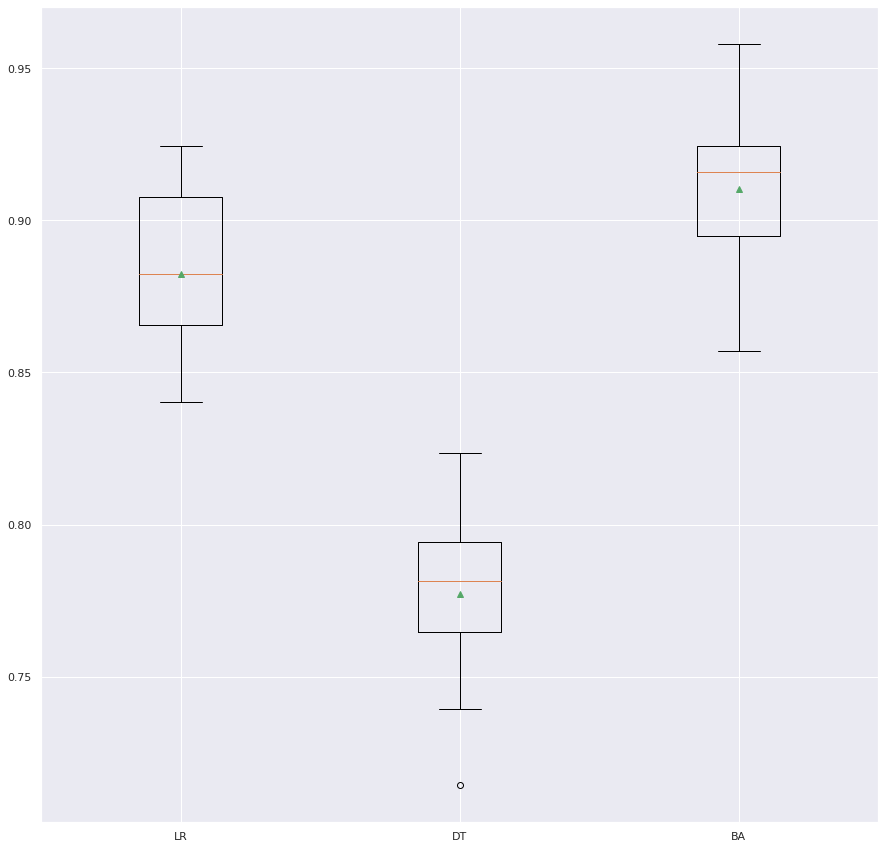

In [51]:
plt.boxplot(resultadosRecallTrain, labels=nombres, showmeans=True)
plt.show()

In [52]:
def get_modelsRegs():
  modelos, nombres = list(), list()

  # LR - sin regularización:
  modelos.append(LogisticRegression(penalty='none', solver='lbfgs', max_iter=2000, random_state=1))
  nombres.append('LR')

  # Lasso:
  modelos.append(LogisticRegression(penalty='l1', solver='liblinear', max_iter=2000, C=100., random_state=1))
  nombres.append('LASSO')
  
  # Ridge:
  modelos.append(LogisticRegression(penalty='l2', solver='liblinear', max_iter=10000, C=100., random_state=1))
  nombres.append('RIDGE')
  
  # Elastic-Net:
  modelos.append(LogisticRegression(penalty='elasticnet', l1_ratio=0.5, solver='saga', max_iter=4000, C=1., random_state=1))
  nombres.append('EN')

  return modelos, nombres

>> LR 0.767 (0.040)
>> LASSO 0.768 (0.040)
>> RIDGE 0.767 (0.040)
>> EN 0.764 (0.038)


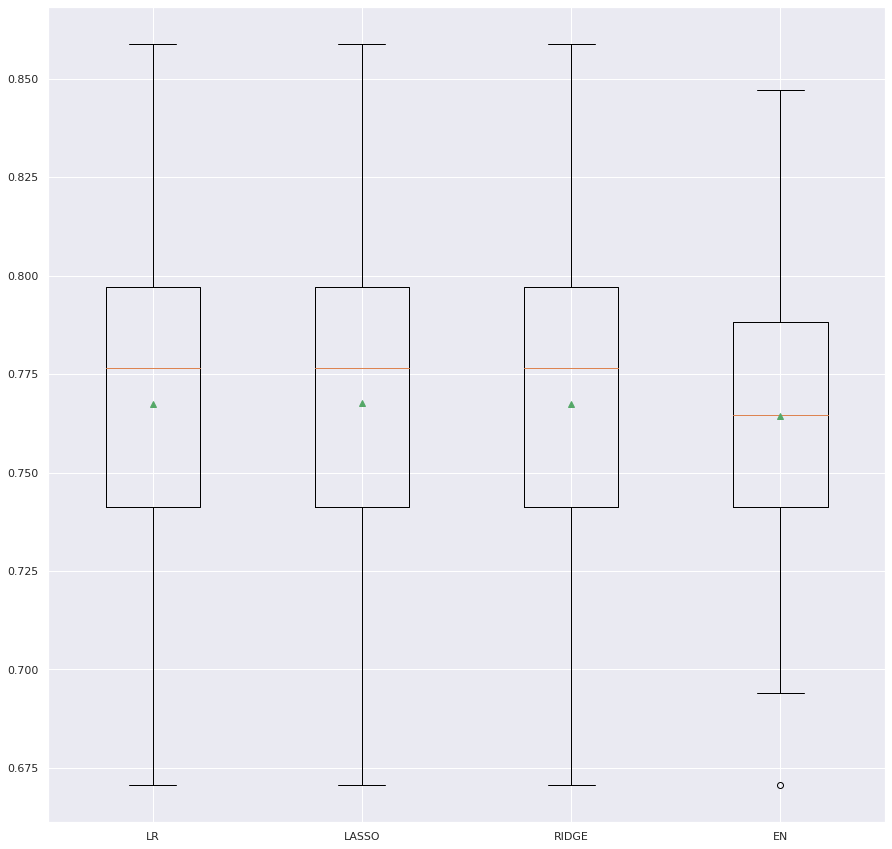

In [53]:
modelos, nombres = get_modelsRegs()
resultados = list() 

for i in range(len(modelos)):

  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])

  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=8)
  scores = cross_val_score(pipeline, X_train, np.ravel(y_train), scoring='accuracy', cv=cv)

  resultados.append(scores)
  print('>> %s %.3f (%.3f)' % (nombres[i], np.mean(scores), np.std(scores)))


plt.boxplot(resultados, labels=nombres, showmeans=True)
plt.show()

In [54]:
# RIDGE - métrica L2:

modelo = LogisticRegression(penalty='l2', max_iter=10000, random_state=1)

dicc_grid = {'C':[0.0001,0.01,0.1,1.0,10.,100.],
             'solver':['newton-cg','lbfgs','liblinear','sag','saga']
             }

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=8)

grid = GridSearchCV(estimator=modelo, 
                    param_grid=dicc_grid, 
                    cv=cv, 
                    scoring='accuracy')

In [55]:
# Transformamos los datos de entrada:
Xx = columnasTransformer.fit_transform(X_train)

# Llevamos a cabo el proceso de etrenamiento con validación-cruzada y búsqueda de malla.
# Observa que de acuerdo a las opciones incluidas en la malla, se estarán realizando (6)(5)=30 
# combinaciones diferentes, además de las (10)(5)=50 particiones de la validación-cruzada,
# lo cual implica también un mayor tiempo de entrenamiento.

grid.fit(Xx, np.ravel(y_train))

print('Mejor valor de exactitud obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
print('Métrica utilizada:', grid.scoring)

Mejor valor de exactitud obtenido con la mejor combinación: 0.7675294117647059
Mejor combinación de valores encontrados de los hiperparámetros: {'C': 10.0, 'solver': 'sag'}
Métrica utilizada: accuracy


In [56]:
modelo = LogisticRegression(penalty='l2', 
                            max_iter=10000,
                            C=10.0,
                            solver='sag',
                            random_state=1)

# Entrenamos el modelo por última vez con los datos de entrenamiento y validación conjuntos:
Xct = columnasTransformer.fit(X_train)
Xxt = Xct.transform(X_train)
modelo.fit(Xxt, np.ravel(y_train))

# Transformamos los datos de prueba y los utilizamos por primera vez para obtener sus predicciones
# y desempeño del modelo:

Xxtest = Xct.transform(X_test)
print(modelo.score(Xxtest, np.ravel(y_test)))

0.7266666666666667


In [57]:
def mi_LearningCurvePlot(train_sizes, train_scores, val_scores):

    # Argumentos de entrada de la función mi_LearningCurvePlot:
    #      train_sizes : número de observaciones en el conjunto de entrenamiento.
    #      train_scores : Exactitud de cada partición en el proceso de Validación-Cruzada (VC) en los datos de entrenamiento.
    #                     La dimensión de este conjunto es (pxq) 
    #                                     donde p="número de particiones de manera incremental del conjunto de entrenamiento".
    #                                           q="número de particiones de VC" * "número de repeticiones de VC con RepitedStratifiedCV"
    #      val_scores : Exactitud de cada partición en el proceso de Validación-Cruzada en los datos de validación.
    #                   Es de la misma dimensión que los train_scores. 
    # Output: la salida es el gráfico con las curvas de aprendizaje.

    # Obtenemos los promedios y desviaciones estándar de cada renglón de los resultados de entrenamiento y validación
    # La dimensión de cada uno es p="número de particiones de manera incremental del conjunto de entrenamiento".
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Graficamos las curvas de aprendizaje incluyendo una región indicando la desviación estándar.
    plt.figure(figsize=(7,6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')
    
    plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')
    
    plt.title('Curvas de Aprendizaje incrementando el tamaño de la muestra')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.ylabel('Exactitud (accuracy)')
    plt.grid()
    plt.legend(loc='lower left')
    plt.show()

In [58]:
def mi_ModeloYCurvas(Xin):
       # Usemos primeramente el modelo de regresión logística
       # con sus parámetros predeterminados y semilla igual a 1.
       # Incremenetamos además el máximo de iteraciones para 
       # asegurar la convergencia de cada partición de la VC.

       modelo = LogisticRegression(penalty='l2', 
                            max_iter=10000,
                            C=10.0,
                            solver='sag',
                            random_state=1)

       ########################################################################
       # INICIA LA SECCIÓN PARA AGREGAR CÓDIGO.
       # Ejercicio 2
       # Sustituye "None" por el código que se te indica.

     
       # Ejercicio 2.1: Define el pipeline como se te indicó:
       # Se espera una línea de código.

       mi_pipe = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])


       # Ejercicio 2.2: Aplica validación cruzada estratificada y con repeticiones.
       #                Solo define los tres argumentos que se te indicaron.
       # Se espera una línea de código.

       mi_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)


       # Ejercicio 2.3: Genera un arreglo con los 40 valores de los tamaños de muestra:
       # Se espera una línea de código.
       
       delta_train_sz = np.linspace(0.1, 1.0, 40)


       # Ejercicio 2.4:: Incluye los argumentos que se te indican a la 
       # función learning_curve. Solo sustituye "None" por el valor del
       # argumento adecuado en cada caso.

       tr_sizes, tr_scores, val_scores = learning_curve(estimator = mi_pipe ,    
                                                        X = Xin,
                                                        y = y_train,
                                                        cv = mi_kfold ,
                                                        train_sizes = delta_train_sz ,
                                                        random_state=11)
       
       # TERMINA LA SECCIÓN PARA AGREGAR CÓDIGO.
       ######################################################################


       # Obtenemos el gráfico con las curvas de aprendizaje:
       mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores)

Curvas de aprendizaje del modelo lineal:


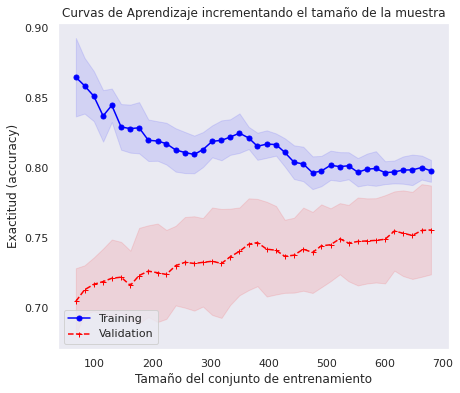

In [59]:
print('Curvas de aprendizaje del modelo lineal:')
mi_ModeloYCurvas(X_train)

In [60]:
def mi_ModeloYCurvasArbol(Xin,Yin):
       # Usemos primeramente el modelo de regresión logística
       # con sus parámetros predeterminados y semilla igual a 1.
       # Incremenetamos además el máximo de iteraciones para 
       # asegurar la convergencia de cada partición de la VC.

       modelo = RandomForestClassifier()

       ########################################################################
       # INICIA LA SECCIÓN PARA AGREGAR CÓDIGO.
       # Ejercicio 2
       # Sustituye "None" por el código que se te indica.

     
       # Ejercicio 2.1: Define el pipeline como se te indicó:
       # Se espera una línea de código.

       mi_pipe = Pipeline(steps=[('ct',columnasTransformer),('m',modelo)])


       # Ejercicio 2.2: Aplica validación cruzada estratificada y con repeticiones.
       #                Solo define los tres argumentos que se te indicaron.
       # Se espera una línea de código.

       mi_kfold = RepeatedStratifiedKFold (n_splits=5, n_repeats=3, random_state=0)


       # Ejercicio 2.3: Genera un arreglo con los 40 valores de los tamaños de muestra:
       # Se espera una línea de código.
       
       delta_train_sz = np.linspace(.1, 1, 20)


       # Ejercicio 2.4:: Incluye los argumentos que se te indican a la 
       # función learning_curve. Solo sustituye "None" por el valor del
       # argumento adecuado en cada caso.

       tr_sizes, tr_scores, val_scores = learning_curve(estimator = mi_pipe ,    
                                                        X = Xin,
                                                        y = Yin,
                                                        cv = mi_kfold ,
                                                        train_sizes = delta_train_sz ,
                                                        random_state=10,
                                                        scoring=make_scorer(mi_recall))
       
       
       # TERMINA LA SECCIÓN PARA AGREGAR CÓDIGO.
       ######################################################################


       # Obtenemos el gráfico con las curvas de aprendizaje:
       mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores)

Curvas de aprendizaje del modelo Árbol:


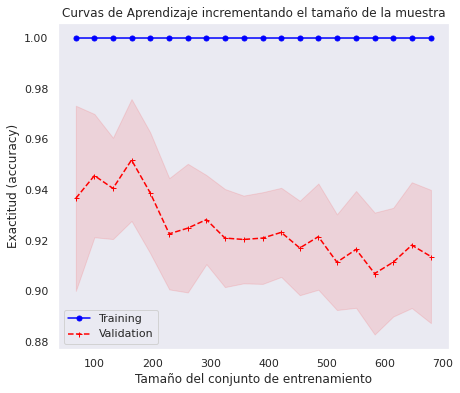

In [61]:
print('Curvas de aprendizaje del modelo Árbol:')
mi_ModeloYCurvasArbol(X_train, y_train)

#**Ejercicio-5.**

In [62]:
None

#**Ejercicio-6.**

In [63]:
None

###**Fin de la Actividad de la semana 6.**